In [1]:
%matplotlib inline
'''
Use %matplotlib inline instead of %matplotlib widget when preparing the final report. 
Otherwise the images are, unfortunately, not embedded in the pdf. 
'''

from importstatements import *
css_styling()

## Module 2: Statistics and correlation
### Medical Signal Processing and Statistics (E010390)
#### Dept of Information Technology (UGent) and Dept of Electronics and Informatics (VUB)

<font color=blue>Students names and IDs: </font>Constantijn Coppers (, Vincent Monden, Lotte Vervaet <Br>
<font color=blue>Academic Year </font>: 2022-2023

In [17]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors as colors
from scipy import stats
import statsmodels.api as sm
import scipy.io

ModuleNotFoundError: No module named 'statsmodels'

In [16]:
pip list

Package                  Version
------------------------ ----------
aiofiles                 22.1.0
aiosqlite                0.18.0
anyio                    3.6.2
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asttokens                2.2.1
attrs                    22.2.0
Babel                    2.11.0
backcall                 0.2.0
beautifulsoup4           4.11.2
bleach                   6.0.0
certifi                  2022.12.7
cffi                     1.15.1
charset-normalizer       3.0.1
colorama                 0.4.6
comm                     0.1.2
contourpy                1.0.7
cycler                   0.11.0
debugpy                  1.6.6
decorator                5.1.1
defusedxml               0.7.1
executing                1.2.0
fastjsonschema           2.16.2
fonttools                4.38.0
fqdn                     1.5.1
gitdb                    4.0.10
GitPython                3.1.30
idna                     3.4
ipykernel        

### General info
In this exercise, you will get hands-on experience with available statistical tests which can be used to test for normality of a dataset or for correlation between variables. You will also get a flavor of hypothesis testing using either standard formula, python tests or resampling methods. Resampling methods can be used for a broad range of applications in data-science and will be further explored in later lab exercises.

### Check for normality of your dataset

The fruitfly dataset
Data are per diem number of eggs laid per female fruitfry for the first 14 days of life 
for 25 females in 3 genetic lines of the fruitfly Drosophila melanogaster
- column 1: RS-line, bred for resistance against DDT
- column 2: SS-line, bred for susceptability to DDT
- column 3: control group

In [7]:
dat = np.loadtxt('FRUITFLY.DAT', dtype='float', comments = '#', delimiter = None, converters = None, skiprows = 0, usecols = None, unpack = False, ndmin = 0)

<div class="alert alert-info">

**Task**
    
Test whether the data in the RS group is normally distributed and compare the outcomes of different normality tests. Visualize the distribution of the RS-line data by plotting a histogram of the dataset (`plt.hist function`).

Test the normality of the given fruitfly data-set by applying: 
- the Kolmogorov Smirnov test (`stats.kstest`)
- the Kolmogorov Smirnov test after normalizing the data by its mean (`np.mean`) and standard deviation (`np.std`)
- by applying a lilliefors test (`sm.stats.lilliefors`). 

Now perform the same analysis for an arbitrary normal random-number dataset of 100 samples you generate with a mean of 5 and standard deviation of 2 (`np.random.normal`).

What do the outcomes of the respective tests mean ($h$-statistic) and $p$-value) with respect to the zero-hypotheses associated with the tests? Are the RS-line data normally distributed? 
    
What your answer should look like:
    
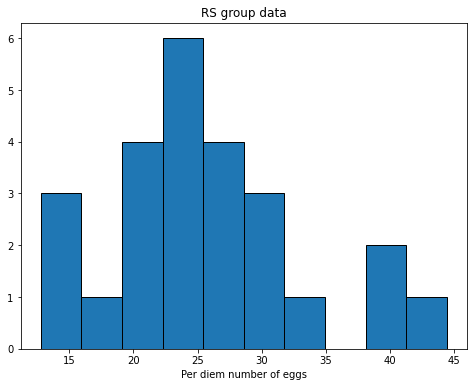

**Solution**

***1. Histogram and CDF's***

In [10]:
# unpack data
RS = dat[:,0]

# statistics
mean, std = stats.norm.fit(RS)

# normal distribution function
p = lambda x: stats.norm.pdf(x, mean, std)

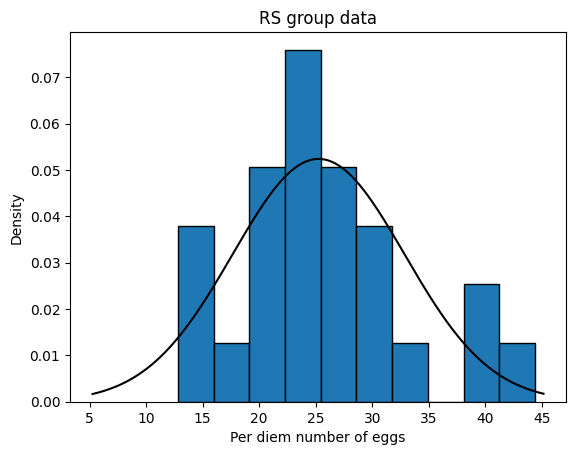

In [11]:
## plotting the histogram ##
fig, ax = plt.subplots()

# plotting histogram
pdf, bins, obj = ax.hist(RS, edgecolor = 'black', density = True)

# plotting the normal distribution fit of the data
x = np.arange(mean - 20, mean + 20, 0.1)
ax.plot(x, p(x), color = 'black')

# lay-out
plt.title('RS group data')
ax.set_xlabel('Per diem number of eggs')
ax.set_ylabel('Density')

plt.show()

In [12]:
# cdf of sample/normal dist.

count, bins2 = np.histogram(RS)
cdf_s = np.cumsum(count/sum(count))
cdf_n = lambda x: stats.norm.cdf(x, loc = mean, scale = std)

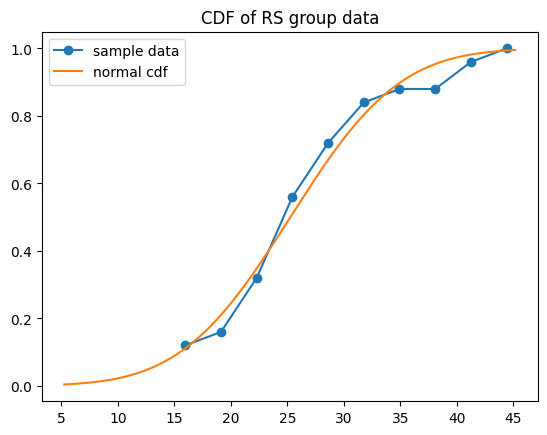

In [13]:
## plotting the cdf of smaple and normal distribution ##
fig = plt.subplot()

# plotting the data
plt.plot(bins[1:], cdf_s, marker = 'o', label = 'sample data')
plt.plot(x, cdf_n(x), label = 'normal cdf')

# lay-out
plt.title('CDF of RS group data')
ax.set_xlabel('Per diem number of eggs')
plt.legend()

plt.show()

***2. Normality test***

In [14]:
## performing the normality tests ##

# not normalized
print(stats.kstest(RS, cdf_n))

# normalized
print(stats.kstest((RS-mean)/std, 'norm'))

# lilliefors test
print(sm.stats.lilliefors(RS, 'norm'))

KstestResult(statistic=0.14094983019923957, pvalue=0.6522566408116208, statistic_location=23.7, statistic_sign=1)
KstestResult(statistic=0.14094983019923957, pvalue=0.6522566408116208, statistic_location=-0.2043239701507003, statistic_sign=1)


NameError: name 'sm' is not defined

***3. Normality test on simulated data***

In [9]:
## data ##
mean, stdev, N = 5, 2, 100
X = np.random.normal(mean, stdev, N)

In [10]:
class TestNormality:
    
    def __init__(self, x, name = ''):
        
        # statistics
        self.x, self.n = x, len(x)
        self.mu, self.std = stats.norm.fit(x)
        
        # normal pdf fittet to data
        self.norm = stats.norm(loc = self.mu, scale = self.std)
        
        # data information
        self.name = name
        
    def histogram(self, bins = None, normal_curve = True):
        '''
        Histogram of the input data
        '''
        
        # make the figure
        fig, ax = plt.subplots()
        
        # plot the data
        pdf, bins, obj = ax.hist(self.x, bins = bins, edgecolor = 'black', density = True)
        
        # plot the normal curve
        if normal_curve == True:
            x0 = np.arange(self.norm.ppf(0.001), self.norm.ppf(0.999), 0.1)
            ax.plot(x0, self.norm.pdf(x0), color = 'black')
        
        # lay-out
        ax.set_title(f'Histogram of {self.name}')
        ax.set_xlabel(f'Number ({self.name})')
        
        plt.show()
        
    def cdf_plot(self, bins = None):
        '''
        cummulative distribution function (cdf) of input data
        '''
        # make the figure
        fig, ax = plt.subplots()
        
        count, bins2 = np.histogram(self.x, bins = bins if bins != None else 'auto')
        
        # cdf of sample
        cdf = np.cumsum(count/sum(count))
        ax.plot(bins2[1:], cdf, marker = 'o', label = 'sample CDF')
        
        # cdf normal distribution
        x0 = np.arange(self.norm.ppf(0.001), self.norm.ppf(0.999), 0.1)
        ax.plot(x0, self.norm.cdf(x0), label = 'normal CDF')
        
        ax.set_xlabel('number')
        ax.set_title('CDF of smaple data compared to normal CDF')
        plt.legend()
        
        plt.show()
        
    def KS(self):
        '''
        Kolmogorov Smirnov normality test
        '''
        return stats.kstest((self.x-self.mu)/self.std, 'norm')
    
    def LF(self):
        '''
        Lilliefors normality test
        '''
        return sm.stats.lilliefors(RS, 'norm')
    
    def test(self):
        '''
        Gives an extensive normality analysis
        '''
        
        self.histogram()
        self.cdf_plot()
        stat_KS, p_KS = self.KS()
        stat_LF, p_LF = self.LF()
        
        print(
f"""
Kolmogorov Smirnov normality test
statistic:\t {stat_KS}
p-value:\t {p_KS}

Lilliefors normality test
statistic:\t {stat_LF}
p-value:\t {p_LF}
""")

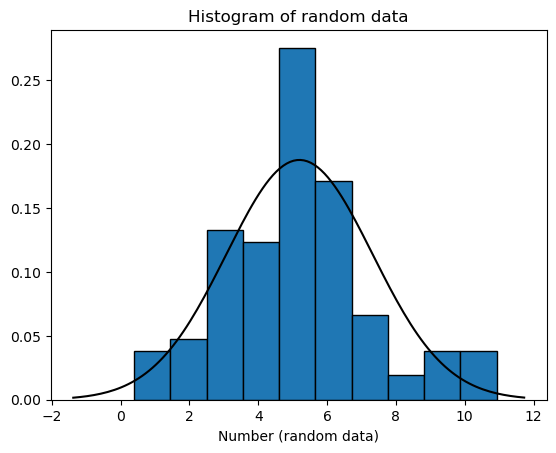

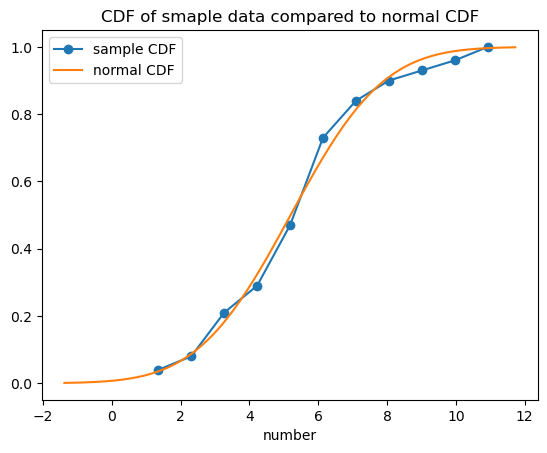


Kolmogorov Smirnov normality test
statistic:	 0.09866775132402483
p-value:	 0.2666065440721491

Lilliefors normality test
statistic:	 0.13933626926411025
p-value:	 0.23588980770989293



In [11]:
TestNormality(X, name = 'random data').test()

<div class="alert alert-success">
<span style="color:black">

* Please ignore the above tags and markup script, and do not remove them. 
* Please enter your task text answers or explanations here. 
* Use `Markdown` mode for this cell. 
* You may use $\LaTeX$ formatting if you require to insert any mathematical formulae (e.g. $x_1=\sin(2\pi f t)$).
    
**Solution**

- From the plots (histogram and CDF), one is able to observe the normality of the data; the normal curves form a (visual) good fit for the data.
- The hypothesis for the normality tests
    \begin{align*}
        H_0&: \text{The sample data is normally distributed} \\
        H_1&: \text{The sample data is not normally distributed}
    \end{align*}
- Both tests are not significant; the $p$-value in the KS (0.65) and LF (0.24) test is greater than the predetermined level of significance $\alpha_{\text{eff}} = 0.05$. This means that the respective test statistic is in the 'acceptance area'. The nul-hypothesis ($H_0$) is not rejected.
</span>
</div>  

<div class="alert alert-info">

**Task**
    
Use the resampling technique to test wheter the RS-line data-samples represent a random subset of a normal distribution with the same mean and standard deviation of the given RS-line dataset. The question can be reformulated as follows: "How likely is it that we pick a subset of 25 samples with a mean corresponding to the given mean from a standard normal distribution with the same mean?"

To perform this analysis, you should first generate a normal distribution of 1000 datapoints with the same mean and standard deviation than the data from the RS-line. Then, pick 25 random samples (with replacement) from this distribution, calculate the mean of this datasample and store it in a vector. If the calculated mean is larger than that of the RS-dataset count 1, if not count 0. Repeat the 25-sample picking procedure 400 times in a loop. 

Afterwards, plot a histogram of the 400 means and check whether the distribution center is far away from the given mean of the RS-dataset. Additionally, calculate the probability with which the resampled means exceeded the given mean of the RS-dataset. 
- To pick a random sample out of a distribution without replacement use: `np.random.choice(data, size=X, replace=False, p=None)`
- To pick a random sample out of a distribution with replacement (i.e. allowing duplicates) use: `np.random.choice(data, size=X, replace=True, p=None)`

Write the code to perform this resampling approach for normality testing. Do the RS-datasamples stem from a normal distribution? With which certainty can you support/reject this statement? 
    
    
What your answer should look like:
    
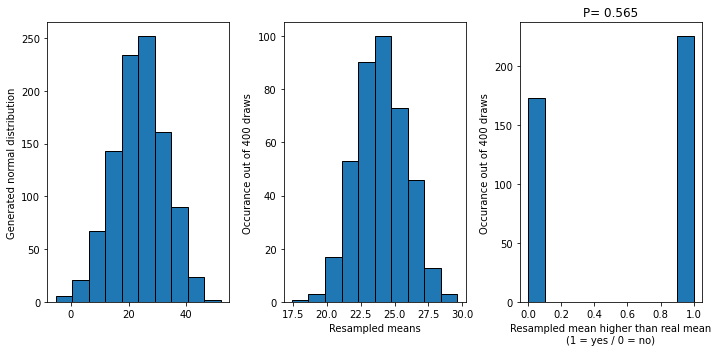

In [12]:
## Resampling ##

# mean and std of RS
mean, std = np.mean(RS), np.std(RS)

# generate normal distribution set with 1000 samples
X = np.random.normal(mean, std, 1000)

# calculate the means
X_av = np.array([np.mean(np.random.choice(X, size = 25, replace = True, p = None)) for i in range(400)])

# counting
X_count = np.where(X_av > mean, X_av, 1)
X_count
X_count = np.where(X_av < mean, X_count, 0)

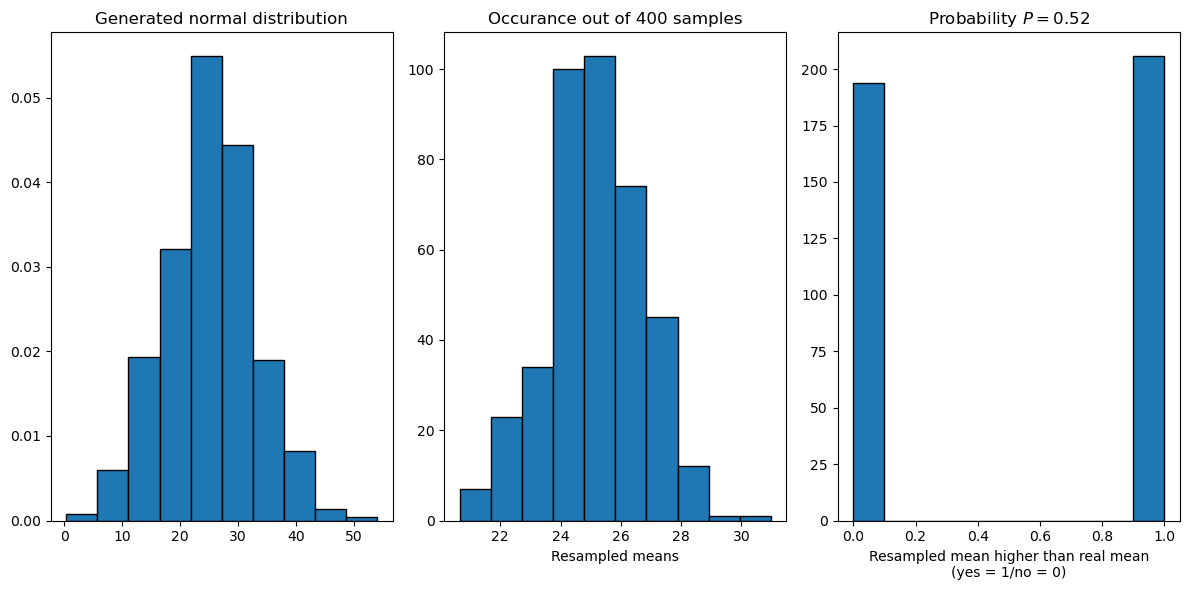

In [13]:
## plotting the data ##

# make the figure
fig, ax = plt.subplots(1, 3, figsize = (12, 6))
       
# plotting the data

## generated normal distribution
ax[0].hist(X, edgecolor = 'black', density = True)
ax[0].set_title(f'Generated normal distribution')


## resampled means
ax[1].hist(X_av, edgecolor = 'black')
ax[1].set_title(f'Occurance out of 400 samples')
ax[1].set_xlabel(f'Resampled means')

## Probability
ax[2].hist(X_count, edgecolor = 'black')

P = X_count.sum()/X_count.size
ax[2].set_title(f'Probability $P = {P:.2f}$')
ax[2].set_xlabel('Resampled mean higher than real mean\n(yes = 1/no = 0)')        
plt.tight_layout()
plt.show()

<div class="alert alert-success">
<span style="color:black">
    
**Solution**\
One can observe that the chance of getting a mean higher than the original mean is 0.5.

In [14]:
## Normality testing -- Resampling ##

# creating the subsets
setA = np.random.normal(mean, std, 25)
setB = RS

# difference in mean
mu_diff = np.abs(np.mean(setB) - np.mean(setA))

# pooling
setAB = np.concatenate((setA, setB))

# resampling (subsets of 15)
subset = lambda x: np.random.choice(setAB, size = 15, replace = True, p = None)
n = 15
res_AB = np.array([np.abs(np.mean(subset(0.))- np.mean(subset(0.))) for i in range(400)])

# p-value
p = len(res_AB[res_AB > mu_diff])/len(res_AB)

In [15]:
p

0.4825

<div class="alert alert-success">
<span style="color:black">

**Solution**\
From the resampling method, one can find that there is no difference between the random generated set from a normal distribution ($\mu = \overline{RS}, \sigma = s_{RS}$) and the RS-data: $p=0.495$. This means that, the chance of getting $\mu_{\text{diff}} > \hat{\mu}$  is about 0.5 (in the resampling). This implies that that the RS group data originates from the same normal distribution.

    
</span>
</div>  

### T-tests

There are several theories which attribute the cause of schizophrenia to changes in the dopamine substance in the central nervous system. In the considered study, 25 hospitalized schizophrenic patients were treated with antipsychotic medication and after a certain period they were either classified as psychotic (YES) or non-psychotic (NO) by the hospital staff based on their behavior. A sample of cerebrospinal fluid was taken from all patients and the dopamine-b hydroxylase (DHB) activity determined in units of nmol of protein. Is the DHB activity related to the presence/absence of schizophrenia?

In this exercise you will use/compare several techniques to test your hypothesis (paper t-test, python t-test, resampling t-test).

In [16]:
NO = [.0104,.0105,.0112,.0116,.0130,.0145,.0154,.0156,.0170,.0180,.0200,.0200,.0210,.0230,.0252] #the NO group
YES = [.0150,.0204,.0208,.0222,.0226,.0245,.0270,.0275,.0306,.0320] #the YES group

<div class="alert alert-info">
    
**Task**

- a) Use a standard paper-and-pen $t$-test to investigate whether DHB activity is related to schizophrenia (use the look-up table provided in the lecture notes). Is this a single or double-sided test? Relate the test outcome to your 0-hypothesis.  

- b) Look up how to use the `scipy.stats.ttest_ind` t-test and apply it to your exercise. What do the test outcomes mean?

- c) We can use a bootstrapping/resampling technique to test the same hypothesis by rephrasing the question as follows: "How likely is it that a differences equalling the mean difference between the two populations can be obtained by chance, when we pick two random YES and NO populations from one population that includes all individuals". This can be executed as follows: Make one population that has all data-points in it (use `np.concatenate`). From it, pick a random subset of YES observations (sampling with replacement N=15) and a random subset of NO observations (sampling with replacement N=10). Calculate the difference in the means of the two random YES and NO samples. If the difference in means is larger than the difference in means of the original YES and NO populations, count = 1, else count = 0. Repeat this procedure 400 times and calculate the probability of obtaining a randomly sampled mean difference larger than the actual mean difference. Do the YES and NO groups have significantly different DHP levels?

- d) Which one of the tests do you trust more? Plot the histograms of the YES and NO group to motivate your answer.
    
What your answer should look like:
    
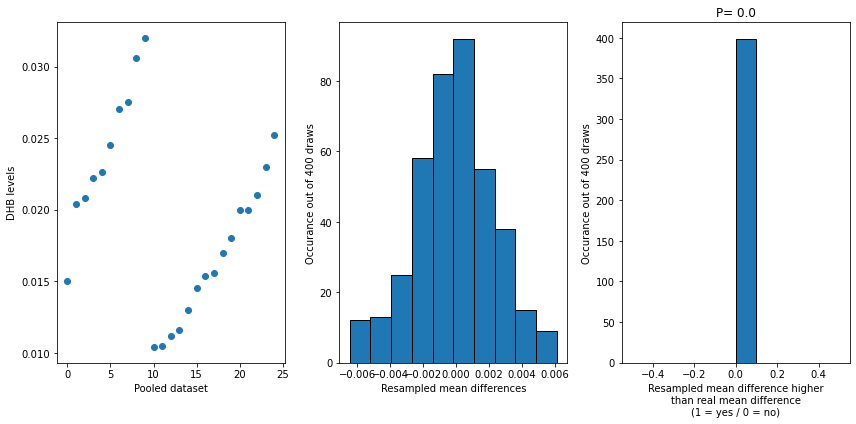

**Solution**

*a)*

In [60]:
def std_corr(x):
    return np.sqrt(np.sum((x-np.mean(x))**2)/(len(x)-1))

In [61]:
mu1, mu2 = np.mean(NO), np.mean(YES)
s1, s2 = np.std(NO), np.std(YES)

s1, s2 = std_corr(NO), std_corr(YES)
n1, n2 = len(NO), len(YES)

In [66]:
s = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2)/(n1+n2-2))

In [67]:
t = (mu2 - mu1)/(s*np.sqrt(1/n2+1/n1))
t

3.936422120611184

In [68]:
df = n2+n1-2
df

23


<div class="alert alert-success">
<span style="color:black">   
Hypothesis \begin{align*} H_0&: \mu_1 = \mu_2 \\ H_1&: \mu_1 \neq \mu_1\end{align*}
     Assume unequal variances: $t = \frac{\mu_2-\mu_1}{s\sqrt{1/n_1+1/n_2}}=4.11$ from the tables: $p<0.001$. This is a double sided test since we are interested in the absolute difference; $\mu_2-\mu_1$ might be negative.


    
</span>
</div>  

*b)*

In [69]:
stats.ttest_ind(YES, NO)

Ttest_indResult(statistic=3.936422120611183, pvalue=0.000658676096416126)

### Correlations
The data-set represent the number of hours classes were attended (column 1) in the semester vs the number of times a student checked his/her phone for new messages during class (column 2).  Is there a correlation between the number of hours of classes were attended and the number of times a person checked their messages?

In [235]:
data = scipy.io.loadmat('set.mat') #the data will be in the form of a dictionary
D=data['set']

<div class="alert alert-info">
    
**Task**
    
- a) Have a first look at the dataset by plotting the columns against each other. Does the data look correlated?

- b) There are several available methods to calculate the correlation between these variables. The possible tests are: pearson correlation (`sci.stats.pearsonr`), Spearman correlation (`sci.stats.spearmanr`), and Kendal Tau (`sci.stats.kendalltau`). Look-up and evaluate the correlation-tests on the python help pages and apply them to your dataset. Answer the following questions: Which of the three tests is suited for the problem at hand (you can plot histograms to motivate your answer). Are the data significantly correlated, and what does the p-value mean in relation to the 0-hypothesis? 

- c) Lastly, apply a linear regression test to your dataset (`stats.linregress`) and use the outcomes of the test to plot linear fit to the data set (datapoints as 'o', and curve-fitting line as '-'). Calculate the residuals from the linear regression line, and check whether they are normally distributed, also check the meaning of the std_err value. Is the linear model a good fit to the dataset at hand and why? 
    
What your figures should look like:
    
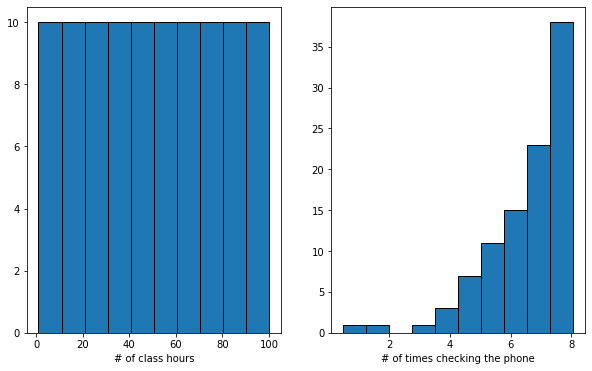

<div class="alert alert-info">

What your answer should look like:
    
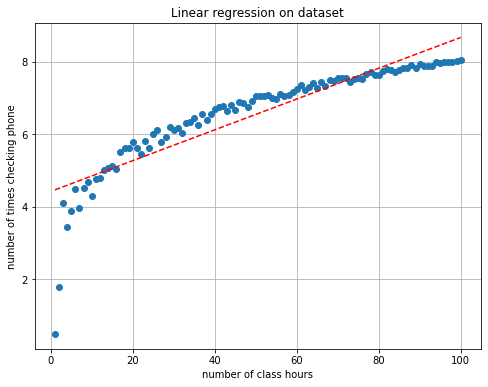

In [236]:
#Your code and figures go here


<div class="alert alert-success">
<span style="color:black">

    
* Your text answers/descriptions go here 

    
</span>
</div>  